# EuroCoinProblem

## Import

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import empiricaldist
from empiricaldist import Pmf, Distribution
from ipywidgets import interact, interactive, fixed

In [ ]:
euro = Pmf.from_seq(range(101))

In [ ]:
euro

0      0.009901
1      0.009901
2      0.009901
3      0.009901
4      0.009901
         ...   
96     0.009901
97     0.009901
98     0.009901
99     0.009901
100    0.009901
Length: 101, dtype: float64

## Custom Likelihood

In [ ]:
def likelihood_euro(data, hypo):
#     print(data, hypo)
    x = hypo/100
    # outcome = data
    if data == 'H':
        return x
    else:
        return 1-x

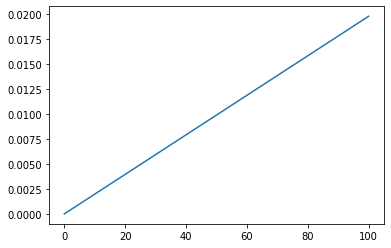

In [ ]:
euro = Pmf.from_seq(range(101))
euro.update(likelihood_euro, 'H')
euro.plot()

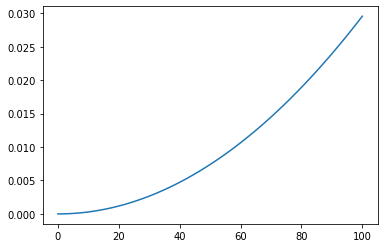

In [ ]:
euro.update(likelihood_euro, 'H')
euro.plot()

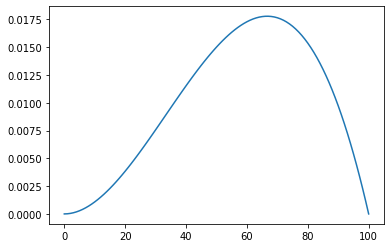

In [ ]:
euro.update(likelihood_euro, 'T')
euro.plot()

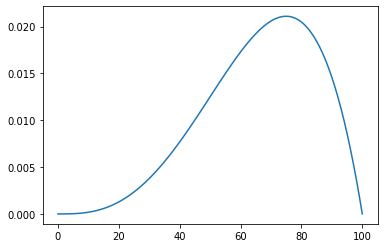

In [ ]:
euro.update(likelihood_euro, 'H')
euro.plot()

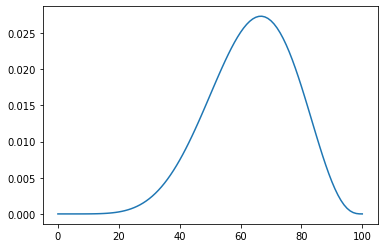

In [ ]:
outcome = 'HHHHHHTTT'
euro = Pmf.from_seq(range(101))
for data in outcome:
    euro.update(likelihood_euro, data)
    
euro.plot()

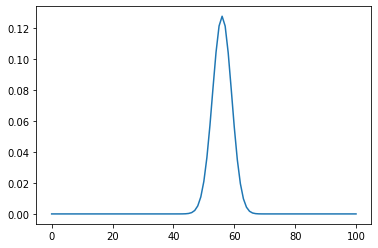

In [ ]:
outcome = 'H'*140+'T'*110
euro = Pmf.from_seq(range(101))
for data in outcome:
    euro.update(likelihood_euro, data)
    
euro.plot()

In [ ]:
euro.mean()

55.95238095238095

In [ ]:
np.percentile(euro, [10,90])

array([1.62410199e-96, 3.48751559e-02])

In [ ]:
#MAP - Maximum aposteori probability
euro.max_prob()

56

In [ ]:
euro.quantile(0.5)

array(56.)

In [ ]:
euro.credible_interval(0.9)

array([51., 61.])

```{note}
Assuming prior and credible is true
```

In [ ]:
euro.mean??

In [ ]:
np.sum(euro.ps*euro.qs)

55.95238095238095

In [ ]:
euro.max_prob??

In [ ]:
euro.idxmax()

56

In [ ]:
euro.credible_interval??

## Effect of Different Priors

In [ ]:
def TriangularPrior():
    """Makes a Suite with a triangular prior
    """
    
    suite = Pmf(name='triangle')
    for x in range(0,51):
        suite[x] = x
    for x in range(51, 101):
        suite[x] = 100-x
    suite.normalize()
    return suite

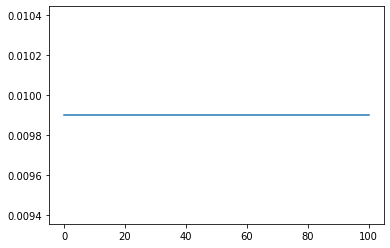

In [ ]:
euro1 = Pmf.from_seq(range(101), name='uniform')
euro1.plot()

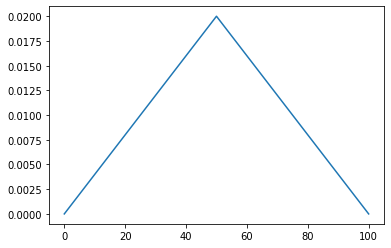

In [ ]:
euro2 = TriangularPrior()
euro2.plot()

In [ ]:
def decorate_euro(title):
    """Labels the axes.
    
    title: string
    """
    plt.xlabel('Probability of heads')
    plt.ylabel('PMF')
    plt.title(title)

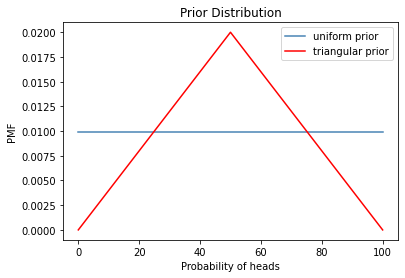

In [ ]:
euro1 = Pmf.from_seq(range(101), name='uniform prior')
euro1.plot(color='steelblue')
euro2 = TriangularPrior()
euro2.plot(color='red', label='triangular prior')

plt.legend()
decorate_euro("Prior Distribution")

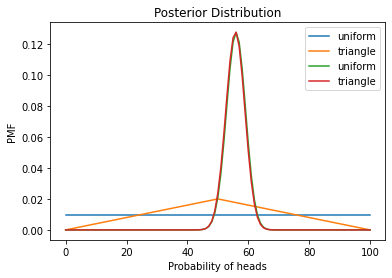

In [ ]:
outcome = 'H'*140+'T'*110

euro1 = Pmf.from_seq(range(101), name='uniform')
euro1.plot()
euro2 = TriangularPrior()
euro2.plot()

for data in outcome:
    euro1.update(likelihood_euro, data)
    euro2.update(likelihood_euro, data)
euro1.plot()
euro2.plot()
plt.legend()
decorate_euro("Posterior Distribution")

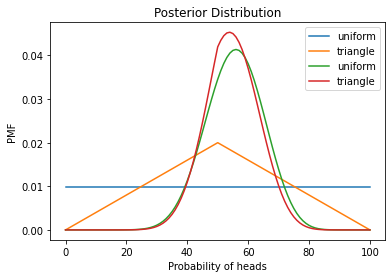

In [ ]:
outcome = 'H'*14+'T'*11

euro1 = Pmf.from_seq(range(101), name='uniform')
euro1.plot()
euro2 = TriangularPrior()
euro2.plot()

for data in outcome:
    euro1.update(likelihood_euro, data)
    euro2.update(likelihood_euro, data)
euro1.plot()
euro2.plot()
plt.legend()
decorate_euro("Posterior Distribution")

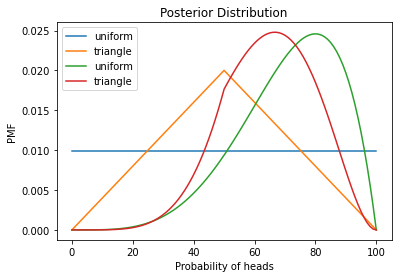

In [ ]:
outcome = 'H'*4+'T'*1

euro1 = Pmf.from_seq(range(101), name='uniform')
euro1.plot()
euro2 = TriangularPrior()
euro2.plot()

for data in outcome:
    euro1.update(likelihood_euro, data)
    euro2.update(likelihood_euro, data)
euro1.plot()
euro2.plot()
plt.legend()
decorate_euro("Posterior Distribution")

0.20888151378589725

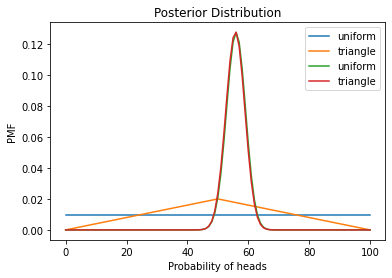

In [ ]:
outcome = 'H'*140+'T'*110

euro1 = Pmf.from_seq(range(101), name='uniform')
euro1.plot()
euro2 = TriangularPrior()
euro2.plot()

for data in outcome:
    euro1.update(likelihood_euro, data)
    euro2.update(likelihood_euro, data)
euro1.plot()
euro2.plot()
plt.legend()
decorate_euro("Posterior Distribution")

euro1.mean() -euro2.mean()

In [ ]:
euro1.credible_interval(0.9)

array([51., 61.])

In [ ]:
euro2.credible_interval(0.9)

array([51., 61.])

- Swammping the priors
- More or less agree for posterior
- if you start with probability zero , you will always get zero 
- Avoid assigning probability to zero on everything 
- Estimated proportions

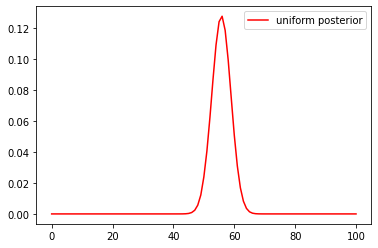

In [ ]:
euro2.plot(color='red', label='uniform posterior')
plt.legend()

In [ ]:
list(range(51))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

## Interactive

In [ ]:
def likelihood_euro(data, hypo):
#     print(data, hypo)
    x = hypo/100
    # outcome = data
    if data == 'H':
        return x
    else:
        return 1-x

In [ ]:
def TriangularPrior(t_peak, n_range):
    """Makes a Suite with a triangular prior
    """
    
    suite = Pmf(name='triangle')
    for x in range(0, t_peak+1):
        suite[x] = x
    for x in range(t_peak+1, n_range):
        suite[x] = (n_range-1)-x
    suite.normalize()
    return suite

In [ ]:
def compare(n_h = 140, n_t=110, t_peak=50, n_range=101):
    outcomes = 'H'*n_h+'T'*n_t

    euro1 = Pmf.from_seq(range(n_range), name='uniform')
    euro2 = TriangularPrior(t_peak, n_range)
    euro1.plot(color='steelblue', label='uniform prior', linestyle='--')
    euro2.plot(color='red', label='triangular prior', linestyle='--')

    for data in outcomes:
        euro1.update(likelihood_euro, data)
        euro2.update(likelihood_euro, data),
    euro1.plot(color='steelblue', label='uniform posterior')
    euro2.plot(color='red', label='triangular posterior')
    plt.legend()

In [ ]:
interactive(compare, n_range=fixed(101), t_peak=fixed(50), n_h=(0,140), n_t=(0,140))

interactive(children=(IntSlider(value=140, description='n_h', max=140), IntSlider(value=110, description='n_t'…